In [292]:
import requests 
import os
import pandas as pd
import numpy as np
import tweepy
from timeit import default_timer 
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = 'darkgrid')
import sklearn

In [62]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_prediction.tsv', mode='wb') as f:
    f.write(response.content)
df_imgs= pd.read_csv('image_prediction.tsv', delimiter='\t')

In [64]:
df1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [103]:
df_imgs.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [48]:
consumer_key= '🤫'
consumer_secret= '🤫'
access_token= '🤫'
access_token_secret= '🤫'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, access_token, access_token_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [53]:
ids= df.tweet_id.values
errors={}
count=0
start= default_timer()
with open('tweet_json.txt','w') as file:
    for tweet_id in ids:
        count +=1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet= api.get_status(tweet_id,tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, file)
            file.write('\n')
        except tweepy.TweepyException as e:
            print("Failed")
            errors['tweet_id']=e
            pass
end=default_timer()
print(end-start)
print(errors)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Failed
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 88605416005907

Rate limit reached. Sleeping for: 343


Success
860: 763183847194451968
Success
861: 763167063695355904
Success
862: 763103485927849985
Success
863: 762699858130116608
Success
864: 762471784394268675
Success
865: 762464539388485633
Success
866: 762316489655476224
Success
867: 762035686371364864
Success
868: 761976711479193600
Success
869: 761750502866649088
Success
870: 761745352076779520
Success
871: 761672994376806400
Success
872: 761599872357261312
Success
873: 761371037149827077
Success
874: 761334018830917632
Success
875: 761292947749015552
Success
876: 761227390836215808
Success
877: 761004547850530816
Success
878: 760893934457552897
Success
879: 760656994973933572
Success
880: 760641137271070720
Success
881: 760539183865880579
Success
882: 760521673607086080
Success
883: 760290219849637889
Success
884: 760252756032651264
Success
885: 760190180481531904
Success
886: 760153949710192640
Success
887: 759943073749200896
Success
888: 759923798737051648
Failed
889: 759846353224826880
Success
890: 759793422261743616
Success
8

Rate limit reached. Sleeping for: 190


Success
1760: 678740035362037760
Success
1761: 678708137298427904
Success
1762: 678675843183484930
Success
1763: 678643457146150913
Success
1764: 678446151570427904
Success
1765: 678424312106393600
Success
1766: 678410210315247616
Success
1767: 678399652199309312
Success
1768: 678396796259975168
Success
1769: 678389028614488064
Success
1770: 678380236862578688
Success
1771: 678341075375947776
Success
1772: 678334497360859136
Success
1773: 678278586130948096
Success
1774: 678255464182861824
Success
1775: 678023323247357953
Success
1776: 678021115718029313
Success
1777: 677961670166224897
Success
1778: 677918531514703872
Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
17

In [60]:
tweet_list= []
with open ('tweet_json.txt','r') as new_file:
    for line in new_file.readlines():
        tweet_line= json.loads(line)
        tweet_id= tweet_line['id']
        retweets= tweet_line['retweet_count']
        likes=tweet_line['favorite_count']
        follows=tweet_line['user']['followers_count']
        friends= tweet_line['user']['friends_count']
        
        tweet_list.append({'id':tweet_id,'retweet_count':retweets,'favorite_count': likes,'followers_count':follows,'friends_count':friends})
df3= pd.DataFrame(tweet_list, columns=['id','retweet_count','favorite_count','followers_count','friends_count'])

In [61]:
df3.head()

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,6948,33589,9397183,21
1,892177421306343426,5250,29143,9397183,21
2,891815181378084864,3459,21931,9396760,21
3,891689557279858688,7165,36691,9396760,21
4,891327558926688256,7694,35045,9397183,21


## Tidiness & Quality Assesment 
In the following cells, I will be assesing the quality and tidiness of each of our data frames, make observations, and then proceed with the cleaning.


In [126]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Tidiness issue:** the dog stages have two different columns when they should have only one.

In [127]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [135]:
df1.shape

(2356, 17)

In [89]:
df1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

> in_reply_to_status_id, in_reply_to_user_id, and retweeted_status_ALL have a majority of nan values.
> Expanded urls have a total of 59 missing values

In [125]:
df1['name'].str.islower().sum() #checking how many on names are in the archive data set variable of names. 

109

> There are 109 values in the name column that start with lower case, all of these are not the actual names of the dogs.

In [82]:
df1.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

> Tweet Id is and interger instead of. string and timestamp an object rather than Date type.

In [136]:
df_imgs.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Tidiness issue:** breeds in the p1,p2,p3 columns all have inconsistent capitalization (some are lower case and others aren't)

In [114]:
df_imgs.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

> Tweet Id is an interger instead of string

In [117]:
len(df_imgs[df_imgs['p1_dog']==False])

543

> There is 543 non-dog entries in the images.

In [137]:
df3.head()

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,6948,33589,9397183,21
1,892177421306343426,5250,29143,9397183,21
2,891815181378084864,3459,21931,9396760,21
3,891689557279858688,7165,36691,9396760,21
4,891327558926688256,7694,35045,9397183,21


In [140]:
df3.friends_count.unique()

array([21])

In [139]:
df3.friends_count.nunique()

1

In [138]:
df1.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


## Description of quality and tidiness issues:

### Quality:
**Twitter archive:**
1. in_reply_to_status_id, in_reply_to_user_id have a majority of nan values. 
2. Expanded urls have a total of 59 missing values.
3. retweeted_status_id, retweeted_status_user_id, and retweeted_status_timpestamp all have a majority of missing values.
4. The tweet_id is an interger instead of a string.
5. The timestamp column has values as objects rather than Date.
6. Names contain invalid entries in lower case that are not actual names of the dogs.

**Images Dataframe:**

7. tweet_id is an interger instead of a string.
8. There are multiple invalid entries of non-dogs.

**Retweets & Favorites Dataframe:**

9. tweet_id is an interger instead of a string. 

### Tidiness:
**Twitter archive:**
1. There are 4 columns for a single variable (dog_stage),"doggo, fluffer, pupper, and puppo".

**Images Dataframe:**

2. The formatting of breeds in this dataframe is inconsistent, with some breeds being capitalized and others not.

**Retweets & Favorites Dataframe:**

3. All values in friends_count column are 21, therefore this columns is unnecessary for analysis.

## Cleaning: 

#### Creating copies:
first we need to create copies of the original data, as it is proper practice.

In [145]:
df1_clean= df1.copy()
df2_clean= df_imgs.copy()
df3_clean=df3.copy() # first we create a copy of all dataframes.

#### Dropping missing values:
*'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'* all have a majority of missing values, which is why we will be dropping the columns entirely.
However, we will be treating the values in expanded_urls differently by dropping only those rows with missing values.

In [146]:
#Since the majority of the values in certain columns are naan, we will drop these columns.
columns_to_drop = df1_clean[['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']]
df1_clean= df1.drop(columns_to_drop, axis=1)
df1_clean.shape #cheking if columns were dropped.

(2356, 12)

In [159]:
#next, we drop the values in extended_urls that are nan. 
df1_clean.dropna(inplace=True)

In [161]:
df1_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

🥳 We have dealt with all the naan values succesfully!

#### Changing datatypes:
We need to change tweet_id dtype to string and timestamp to datetime so we can handle them properly in the analyzing and visualizing steps.

In [234]:
#next we will convert the erroneous dtypes of tweet_id and timestamp to the appropriate ones.
df1_clean['tweet_id']= df1_clean['tweet_id'].astype('str')
df1_clean['timestamp']= df1_clean.timestamp.apply(pd.to_datetime)

In [235]:
df1_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
dog_stage                          object
dtype: object

We have successfully converted timestamp to a datetime dtype and tweet_id to string.

#### Invalid name entries:
Next, the 'name' column in this dataframe contains invalid entries in lowercase, we will need to replace them with None. I chose to replace them with None because that is how all of the empty names are included throughout the dataframe.

In [176]:
invalid_names=[]
for n in df1_clean['name']:
    if n.islower() and n not in invalid_names:
        invalid_names.append(n)
invalid_names

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [178]:
df1_clean['name'].replace(invalid_names,'None', inplace=True)

In [181]:
df1_clean['name'].str.islower().any()

False

**✅ Check!**

#### Multiple columns for 1 variable:
We need to tidy up our data by creating a single column for the stage of the dog rather than the 4 existing ones: *doggo, floofer, pupper, puppo*

In [188]:
#Lastly, we need to tidy up our data by creating a single column for dog_stage.
df1_clean.doggo.replace('None', '', inplace=True)
df1_clean.floofer.replace('None', '', inplace=True)
df1_clean.pupper.replace('None', '', inplace=True)
df1_clean.puppo.replace('None', '', inplace=True)

In [191]:
df1_clean['dog_stage']= df1_clean['doggo'] + df1_clean['floofer']+df1_clean['pupper']+df1_clean['puppo']
df1_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,


In [192]:
#now that we have added all dog stages in one column, we can drop the other ones. 
to_drop= df1_clean[['doggo','floofer','pupper','puppo']]
df1_clean.drop(to_drop,axis=1,inplace=True)

In [193]:
df1_clean.head(0)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [198]:
df1_clean.dog_stage.value_counts()

                1923
pupper           243
doggo             80
puppo             28
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [199]:
#For this step, we will take all empty values in dog_stage and replace them with 'None'
df1_clean.dog_stage.replace('','None', inplace=True)
df1_clean.dog_stage.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

**We did it! We finished cleaning the first data frame, cheers to that 🥂**

### 2nd Dataframe:
#### Fixing datatypes:
First thing we need to do in this dataframe is to turn all values in tweet_id into strings.

In [238]:
df2_clean['tweet_id']= df2_clean.tweet_id.astype('str')
df2_clean.dtypes

tweet_id    object
jpg_url     object
img_num      int64
breed       object
dtype: object

#### There are other animals beside dogs in the dataframe:
Since we will only be analyzing dog data for the WeRateDogs account, we need to get rid of invalid entries that don't meet that requirement by dropping all False values in the p1_dog column.

In [213]:
df2_clean= df2_clean.query('p1_dog==True')
df2_clean.shape

(1532, 12)

#### Less accurate predictions:
We will only be using the first prediction of breed and dropping the rest since the first is the most accurate.

In [216]:
will_drop= df2_clean[['p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']]
df2_clean.drop(will_drop,axis=1,inplace=True)

#### Consistency in breed names:
All breeds will be changed to lowercase for consistency.

In [219]:
df2_clean['breed']=df2_clean['p1'].str.lower()#making a new column with all values in lowercase
df2_clean.drop('p1',axis=1,inplace=True)

In [240]:
df2_clean.head()

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


**Success!** ✅

#### Changing Dtype and dropping unnecessary columns in 3rd dataframe:
The third and last dataset only needs to have tweet_id be a string, and to get rid of the frieds_count columns. 

In [225]:
df3_clean['tweet_id']= df3_clean['id'].astype('str')
columns_dropping=df3_clean[['id','friends_count']]
df3_clean.drop(columns_dropping,axis=1, inplace=True)

In [226]:
df3_clean.head()

,retweet_count,favorite_count,followers_count,tweet_id
0,6948,33589,9397183,892420643555336193
1,5250,29143,9397183,892177421306343426
2,3459,21931,9396760,891815181378084864
3,7165,36691,9396760,891689557279858688
4,7694,35045,9397183,891327558926688256


In [228]:
df3_clean.dtypes

retweet_count       int64
favorite_count      int64
followers_count     int64
tweet_id           object
dtype: object

#### Merging Dataframes:
All dataframes should be merged together to create one high-quality, tidy master DataFrame.

In [236]:
df_all_clean= pd.merge(df1_clean, df2_clean, on='tweet_id', how='inner').merge(df3_clean, on='tweet_id', how='inner' )

In [237]:
df_all_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed,retweet_count,favorite_count,followers_count
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,5250,29143,9397183
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,3459,21931,9396760
2,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,7694,35045,9397183
3,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,2573,17686,9397331
4,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,1641,10289,9397183


## Storing our data

In [241]:
df_all_clean.to_csv("twitter_archive_master.csv", index=False)

In [242]:
df_all=pd.read_csv('twitter_archive_master.csv')
df_all.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed,retweet_count,favorite_count,followers_count
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,5250,29143,9397183
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,3459,21931,9396760
2,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,7694,35045,9397183
3,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,2573,17686,9397331
4,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,1641,10289,9397183


### Our data is now tidy, stored, and ready to be analyzed! 🎉

# Analysis and Visualization
Here, I will be analyzing the data I've compiled and cleaned to gather insights.

### 1. Do certain breeds get higher retweet counts?

In [437]:
breeds = df_all.groupby('breed')

In [295]:
breeds_retweets= breeds.retweet_count.max().sort_values(ascending=False)
breed_likes=breeds.favorite_count.max().sort_values(ascending=False)

In [296]:
top_10_breeds=breeds_retweets.head(10)
top10_liked= breed_likes.head(10)

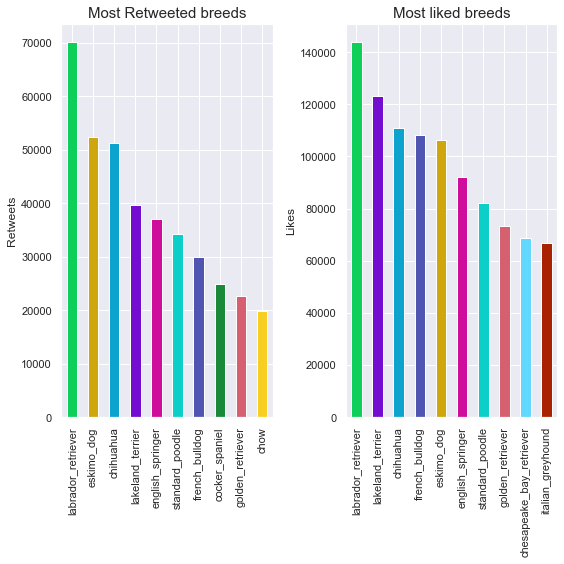

In [325]:
plt.subplots(figsize=(8, 8))
plt.subplot(1,2,1)
top_10_breeds.plot(x='breed', y='retweet_count',kind='bar', color=['#0DCF5A','#CFA60D','#0DA3CF','#740DCF','#CF0D9D','#0DCFC9','#5055B2','#1A8938','#D46070','#F9CE23'])
plt.title('Most Retweeted breeds', fontsize=15)
plt.xlabel('')
plt.ylabel('Retweets',fontsize=12)

plt.subplot(1,2,2)
top10_liked.plot(x='breed', y='favorite_count',kind='bar',color=['#0DCF5A','#740DCF','#0DA3CF','#5055B2','#CFA60D','#CF0D9D','#0DCFC9','#D46070','#62D8FE','#A92201'])
plt.title('Most liked breeds', fontsize=15)
plt.xlabel('')
plt.ylabel('Likes',fontsize=12)
plt.tight_layout()

#### Insight: 
Labrador Retriever is the most retweeted and liked breed of dog. However, the breeds of dogs liked do vary from those retweeted. While the *Chesapeake Bay Retriever* or the *Italian Greyhound* were not in the top 10 most retweeted breeds, they did make it into the top ten most liked ones. 

### 2. Does WeRateDogs have a favorite breed?
Here, we will check out the highest ratings given by WeRateDogs and whether they favor a specific breed.

In [339]:
high_ratings=breeds.rating_numerator.max().sort_values(ascending=False)
pref_breeds= high_ratings.head(10)

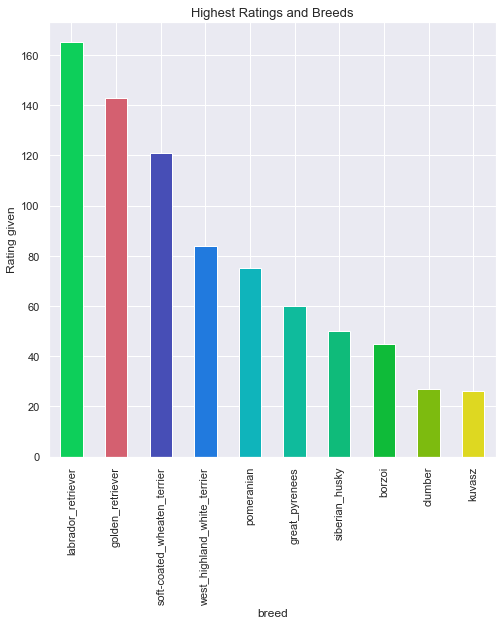

In [355]:
pref_breeds.plot.bar(x='breed',y='rating_numerator', color=['#0DCF5A','#D46070','#474EB6','#217ADE','#0FB4BB','#0FBB9C','#0FBB7A','#0FBB39','#7DBB0F','#DED821','#DEB021','#DE8E21'],figsize=(8,8))
plt.title('Highest Ratings and Breeds', fontsize=13)
plt.xlabel('breed')
plt.ylabel('Rating given')
plt.show()

#### Insight: 🐕
It appears not only do audiences favor labrador retrievers but WeRateDogs does as well!! Can we blame them? Nope. 
However, something important to note is that the *only two breeds* that coincide between most liked/retweeted and highest ratings are **labrador and golden retrievers**.

### 3. What is the most common dog stage?

In [406]:
not_none= df_all.query('dog_stage != "None"')
pop_stages= not_none.dog_stage.value_counts()
pop_stages['percent']= pop_stages/pop_stages.sum()
percent_total=pop_stages.percent

<AxesSubplot:ylabel='dog_stage'>

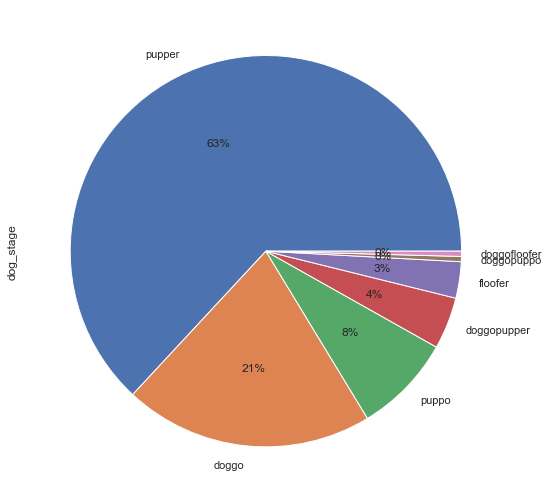

In [408]:
percent_total.plot.pie(autopct='%1.0f%%',figsize=(9,9))

#### Insight:
It appears that the overwhelming majority of dogs who were given a stage were classified as puppers 🐶. Doggofloofers and doggopuppos are a rarity so keep your eye out for them!

### 4. Does dog stage impact engagement?
Do certain dog stages see higher engagement? let's find out!

In [426]:
pupper = not_none.query('dog_stage =="pupper"')
doggo= not_none.query('dog_stage =="doggo"')
puppo= not_none.query('dog_stage =="puppo"')
doggopupper= not_none.query('dog_stage =="doggopupper"')
floofer=  not_none.query('dog_stage =="floofer"')
doggopuppo= not_none.query('dog_stage =="doggopuppo"')#there is only one
doggofloofer=  not_none.query('dog_stage =="doggofloofer"')#only one

In [443]:
pupper_rt= pupper.retweet_count.mean()
doggo_rt= doggo.retweet_count.mean()
puppo_rt= puppo.retweet_count.mean()
doggopupper_rt=doggopupper.retweet_count.mean()
floofer_rt=floofer.retweet_count.mean()
doggopuppo_rt= doggopuppo.retweet_count.mean()
doggofloofer_rt= doggofloofer.retweet_count.mean()

In [444]:
p_fav= pupper.favorite_count.mean()
d_fav= doggo.favorite_count.mean()
pup_fav= puppo.favorite_count.mean()
dp_fav=doggopupper.favorite_count.mean()
f_fav=floofer.favorite_count.mean()
dpup_fav= doggopuppo.favorite_count.mean()
df_fav= doggofloofer.favorite_count.mean()

In [445]:
df_stages= pd.DataFrame({'stage':['pupper','doggo','puppo','doggopupper','floofer','doggopuppo','doggofloofer'],'rt_count':[pupper_rt,doggo_rt,puppo_rt,doggopupper_rt,floofer_rt,doggopuppo_rt,doggofloofer_rt], 'fav_count':[p_fav,d_fav,pup_fav,dp_fav,f_fav,dpup_fav,df_fav]})

**what are we seeing here?**
I created a new dataframe containing the mean values of retweets and favorites for each dog stage to simplify the visualization.

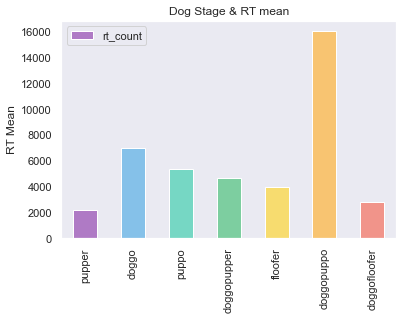

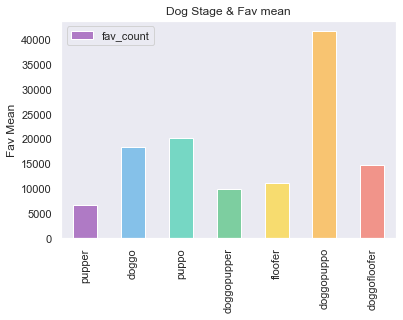

In [462]:
labels= ['pupper','doggo','puppo','doggopupper','floofer','doggopuppo','doggofloofer']
df_stages.plot(x='stage',y='rt_count', kind='bar', color=['#AF7AC5','#85C1E9','#76D7C4','#7DCEA0','#F7DC6F','#F8C471','#F1948A'])
plt.title("Dog Stage & RT mean")
plt.xlabel('')
plt.ylabel('RT Mean')
df_stages.plot(x='stage',y='fav_count', kind='bar',color=['#AF7AC5','#85C1E9','#76D7C4','#7DCEA0','#F7DC6F','#F8C471','#F1948A'])
plt.title("Dog Stage & Fav mean")
plt.xlabel('')
plt.ylabel('Fav Mean')
plt.show()

### Insight:
With only one appearance in WeRateDogs, Doggopuppos may not be the most present but they sure are a favorite, both in retweet and like counts! 
- One thing to note, is that while doggos get the most retweets, puppos have the most likes (following the mystical Doggopuppos of course).

#### who is the mysterious doggopuppo?
<img src="https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg" width="500"/>

In all it's glory 🥺 

#### Thank you!
Thank you for reading this project, my reports for both wrangle efforts and further exploration of the data visualizations will be included in separate documents. Hope you enjoyed going through this project as much as I enjoyed making it.